In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [7]:
from google.colab import files
uploaded=files.upload()

Saving athlete_events (1).csv to athlete_events (1).csv


In [8]:
 # Importing all the required packages
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.preprocessing import MinMaxScaler
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
 from sklearn.feature_selection import SelectKBest
 from sklearn.feature_selection import chi2
 import tensorflow as tf
 from sklearn.naive_bayes import MultinomialNB
 from sklearn.linear_model import LogisticRegression
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.ensemble import GradientBoostingClassifier
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.naive_bayes import GaussianNB

Reading dataset

In [11]:
 # Reading the data
 data = pd.read_csv('athlete_events (1).csv')
 data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66484,34012,"Mohamed Muktar Jama ""Mo"" Farah",M,29.0,175.0,58.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 5,000 metres",Gold
66485,34012,"Mohamed Muktar Jama ""Mo"" Farah",M,29.0,175.0,58.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 10,000 metres",Gold
66486,34012,"Mohamed Muktar Jama ""Mo"" Farah",M,33.0,175.0,58.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 5,000 metres",Gold
66487,34012,"Mohamed Muktar Jama ""Mo"" Farah",M,33.0,175.0,58.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 10,000 metres",Gold


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66489 entries, 0 to 66488
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      66489 non-null  int64  
 1   Name    66489 non-null  object 
 2   Sex     66489 non-null  object 
 3   Age     63916 non-null  float64
 4   Height  51014 non-null  float64
 5   Weight  50203 non-null  float64
 6   Team    66489 non-null  object 
 7   NOC     66489 non-null  object 
 8   Games   66489 non-null  object 
 9   Year    66489 non-null  int64  
 10  Season  66489 non-null  object 
 11  City    66489 non-null  object 
 12  Sport   66489 non-null  object 
 13  Event   66489 non-null  object 
 14  Medal   9212 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 7.6+ MB


In [14]:
# seeing group summary of season cloumn
data['Season'].value_counts()

,count
Season,
Summer,55660
Winter,10829


In [15]:
 # seeing group summary of Medal cloumn
 data['Medal'].value_counts()

,count
Medal,
Gold,3108
Bronze,3063
Silver,3041


In [16]:
 # seeing group summary of Event cloumn
 data['Event'].value_counts()

,count
Event,
Football Men's Football,1649
Hockey Men's Hockey,1069
Ice Hockey Men's Ice Hockey,961
Basketball Men's Basketball,888
Water Polo Men's Water Polo,852
...,...
"Archery Men's Target Archery, 33 metres, Individual",1
"Archery Men's Target Archery, 50 metres, Individual",1
"Archery Men's Pole Archery, Small Birds, Individual",1


In [17]:
 # seeing group summary of Team cloumn
 data['Team'].value_counts()

,count
Team,
United States,4720
France,4402
Italy,3740
Great Britain,3146
Canada,2417
...,...
Mexico-2,1
Argonaut Rowing Club,1
Acturus,1


Exploratory Data Analysis

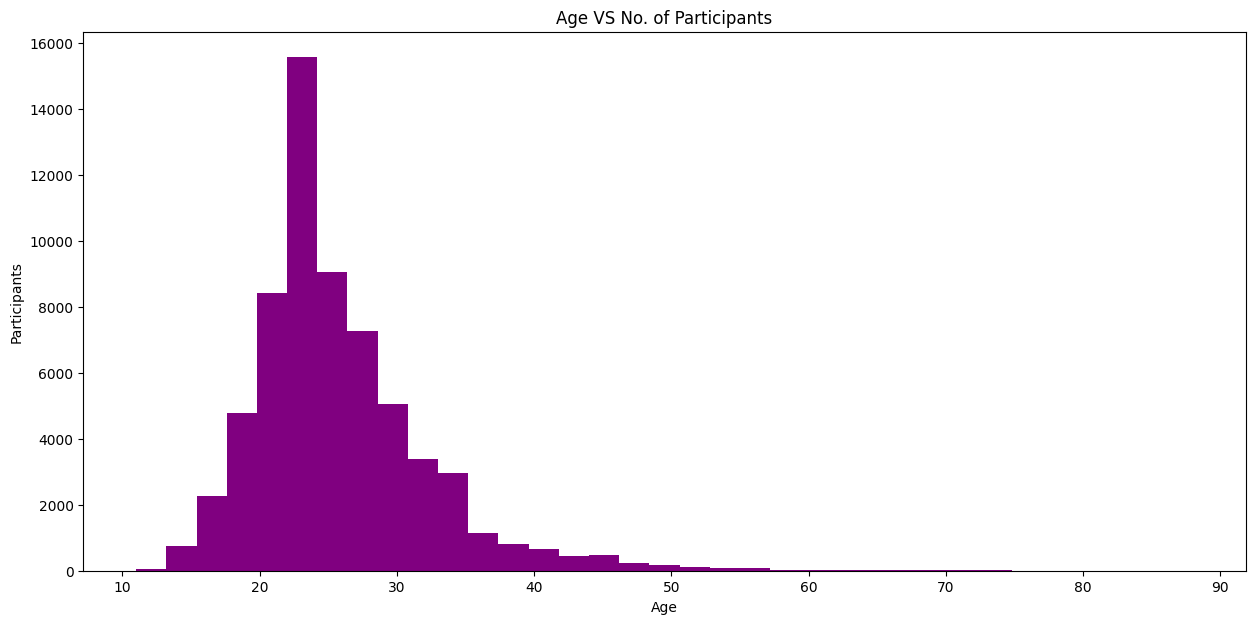

In [18]:
 # Age Distribution
 plt.figure(figsize=(15,7))
 plt.title("Age VS No. of Participants")
 plt.hist(data.Age,color='purple', bins = 35)
 plt.xlabel("Age")
 plt.ylabel("Participants")
 plt.show()

In [19]:
 # Age to participant distribution
 age_dist = data.Age.value_counts().sort_values(ascending=False).head(15)
 age_dist

,count
Age,
23.0,5355
24.0,5180
22.0,5033
25.0,4861
21.0,4804
26.0,4193
27.0,3890
20.0,3629
28.0,3388


Most of the athletes are in between 20-30

In [20]:
 # Gender Distribution
 gender_unique_values = data.Sex.value_counts()
 gender_unique_values

,count
Sex,
M,49332
F,17157


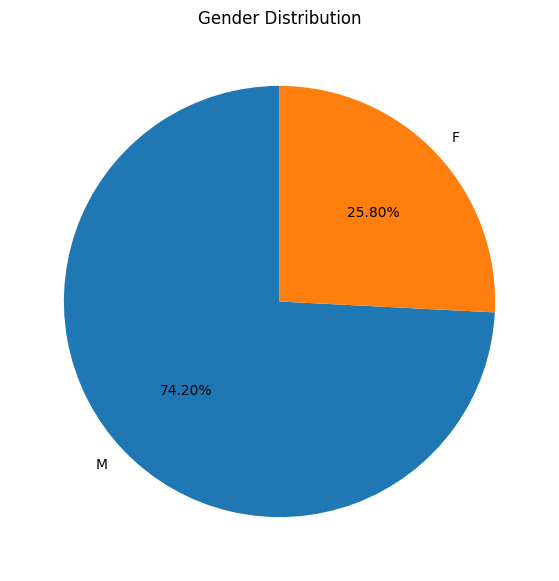

In [21]:
 plt.figure(figsize=(15,7))
 plt.title("Gender Distribution")
 plt.pie(gender_unique_values, labels=gender_unique_values.index, autopct="%.2f%%", startangle=90)
 plt.show()

Here we observe that male participants are moe than female participants in the olympics

In [22]:
 # seeing female participants in each year in summer season
 female_part = data[(data.Sex=='F') & (data.Season == 'Summer')][['Sex', 'Year']]
 female_part = female_part.groupby('Year').count().reset_index()
 female_part

,Year,Sex
0,1900,11
1,1904,2
2,1906,2
3,1908,12
4,1912,30
5,1920,41
6,1924,76
7,1928,93
8,1932,92
9,1936,122


Text(0, 0.5, 'Female Participants')

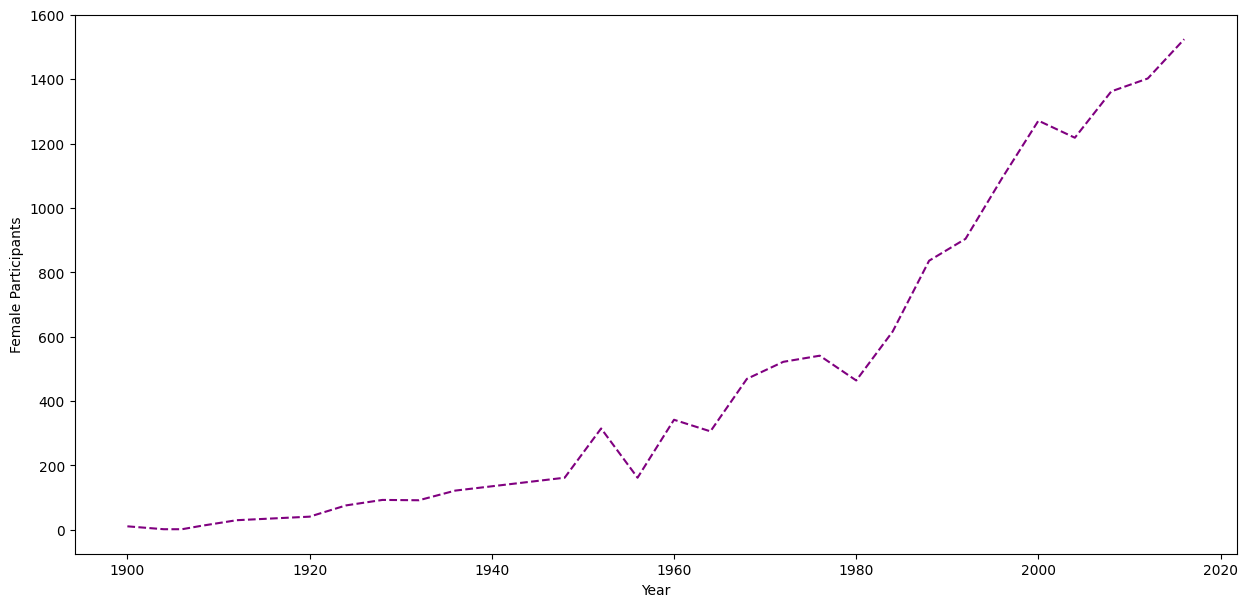

In [23]:
 # Visualizing the female participant data
 plt.figure(figsize=(15,7))
 sns.lineplot(data=female_part, x='Year', y='Sex', linestyle = '--', color = 'purple')
 plt.xlabel('Year')
 plt.ylabel('Female Participants')

We can see that the female Participants have increased by a great extent since 1960's

In [24]:
 # Participants across the season
 seasons = data.Season.value_counts()
 seasons

,count
Season,
Summer,55660
Winter,10829


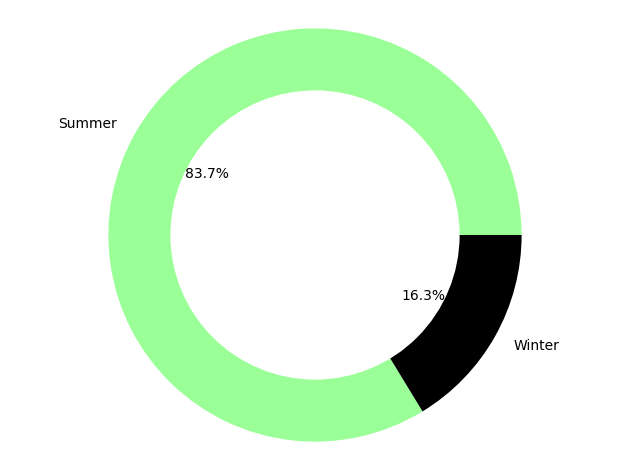

In [25]:
 # Visualizing paritipant distribution in different season
 fig1, ax1 = plt.subplots()
 colors = ['#99ff96','#000000']
 ax1.pie(seasons, colors = colors, labels=seasons.index, autopct='%1.1f%%')
 centre_circle = plt.Circle((0,0),0.70,fc='white')
 fig = plt.gcf()
 fig.gca().add_artist(centre_circle)
 ax1.axis('equal')
 plt.tight_layout()
 plt.show()

Participation in summer is more than in winter season

In [26]:
 # Top 15 Countries participating in Olympics by no. of participants
 top_countries = data.Team.value_counts().sort_values(ascending=False).head(15)
 top_countries

,count
Team,
United States,4720
France,4402
Italy,3740
Great Britain,3146
Canada,2417
Australia,2138
Sweden,1991
Germany,1823
Spain,1661


<Axes: title={'center': 'Top 15 Countries Total Participations'}, xlabel='Team', ylabel='count'>

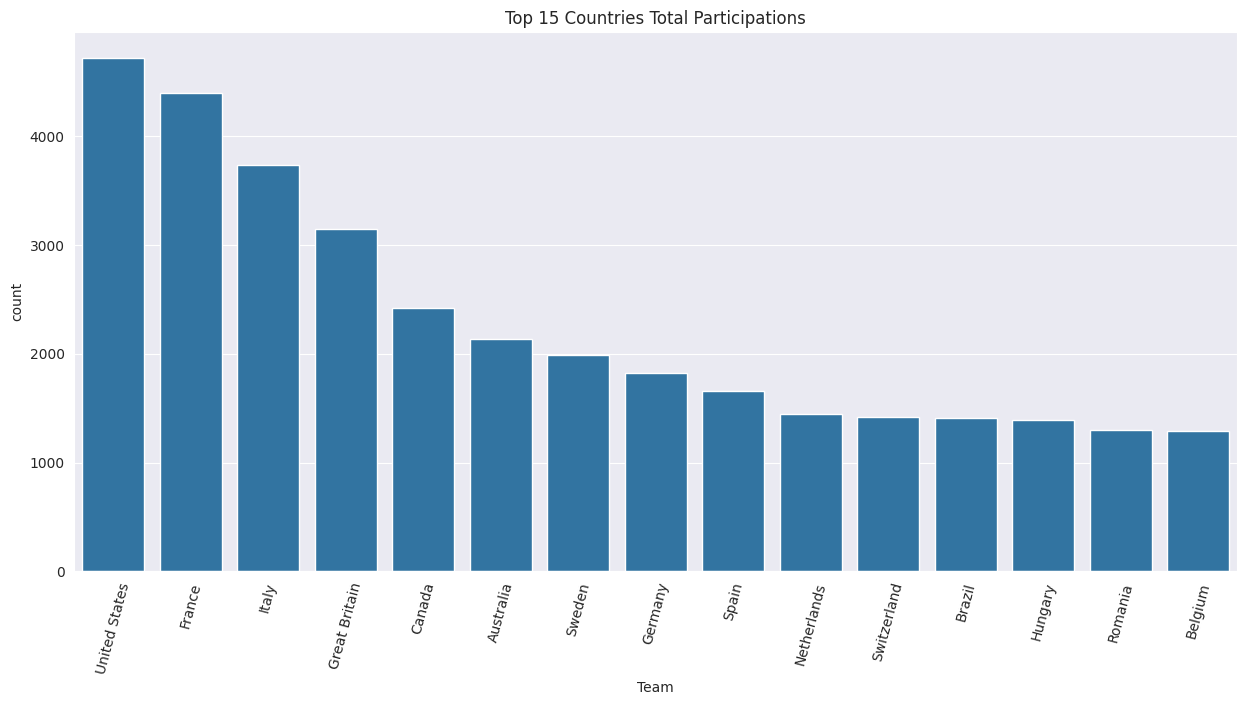

In [31]:
 # Data Visualization of countries participating
 sns.set_style('darkgrid')
 plt.figure(figsize=(15, 7))
 plt.title('Top 15 Countries Total Participations')
 plt.xticks(rotation=75)
 sns.barplot(x=top_countries.index, y=top_countries)


In [32]:
 # Data of countries with most Gold medals
 max_year_country = data[(data.Medal == 'Gold')].Team
 max_year_country = max_year_country.value_counts().head(20)
 max_year_country

,count
Team,
United States,659
Soviet Union,198
Italy,193
France,163
Great Britain,151
Germany,117
Canada,104
Australia,93
Hungary,84


Text(0.5, 0, 'Top 20 Gold Medal Won Countrywise')

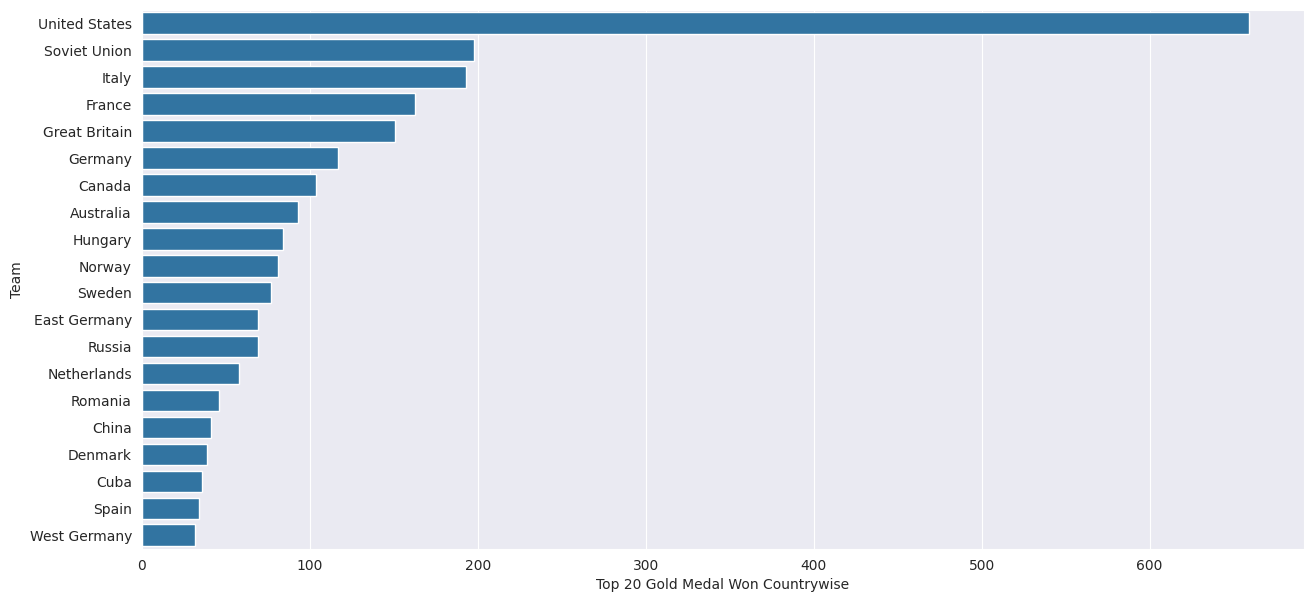

In [33]:
 # Visulaizing the countries with most Gold medals
 plt.figure(figsize=(15,7))
 sns.barplot(x=max_year_country, y=max_year_country.index)
 plt.xlabel("Top 20 Gold Medal Won Countrywise")

Text(0, 0.5, 'Height')

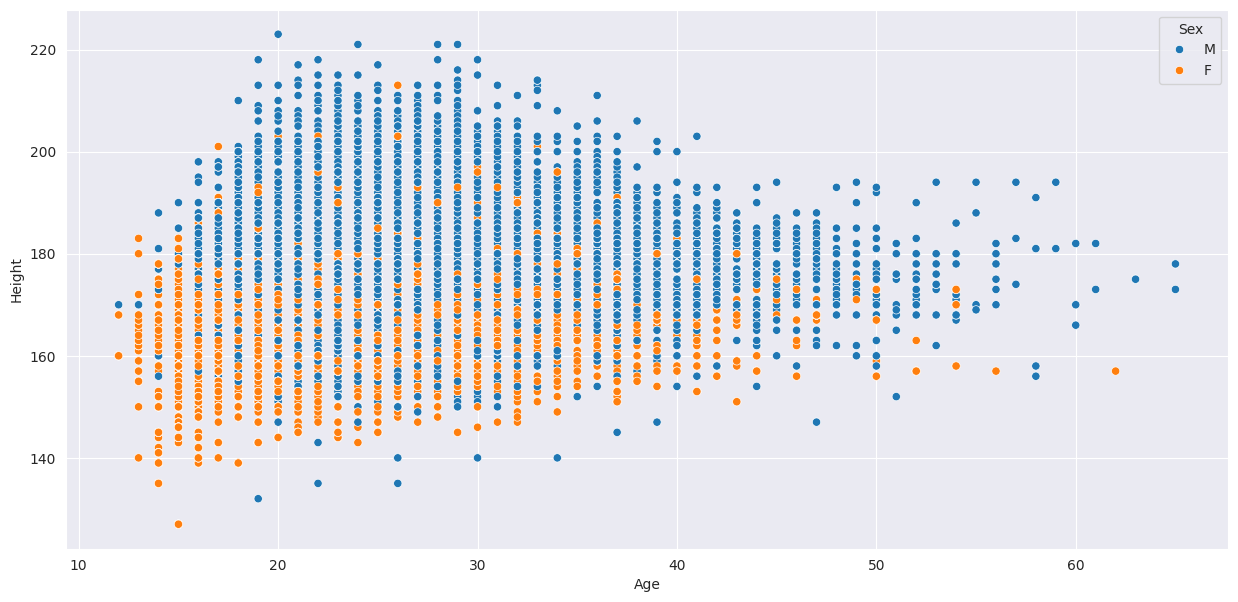

In [34]:
 # Age vs Height Spread
 age_heig = data[(data.Age != 0) & (data.Height != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
 plt.figure(figsize=(15,7))
 sns.scatterplot(x=age_heig.Age, y=age_heig.Height, data=age_heig, hue='Sex')
 plt.xlabel('Age')
 plt.ylabel('Height')

Text(0, 0.5, 'Weight')

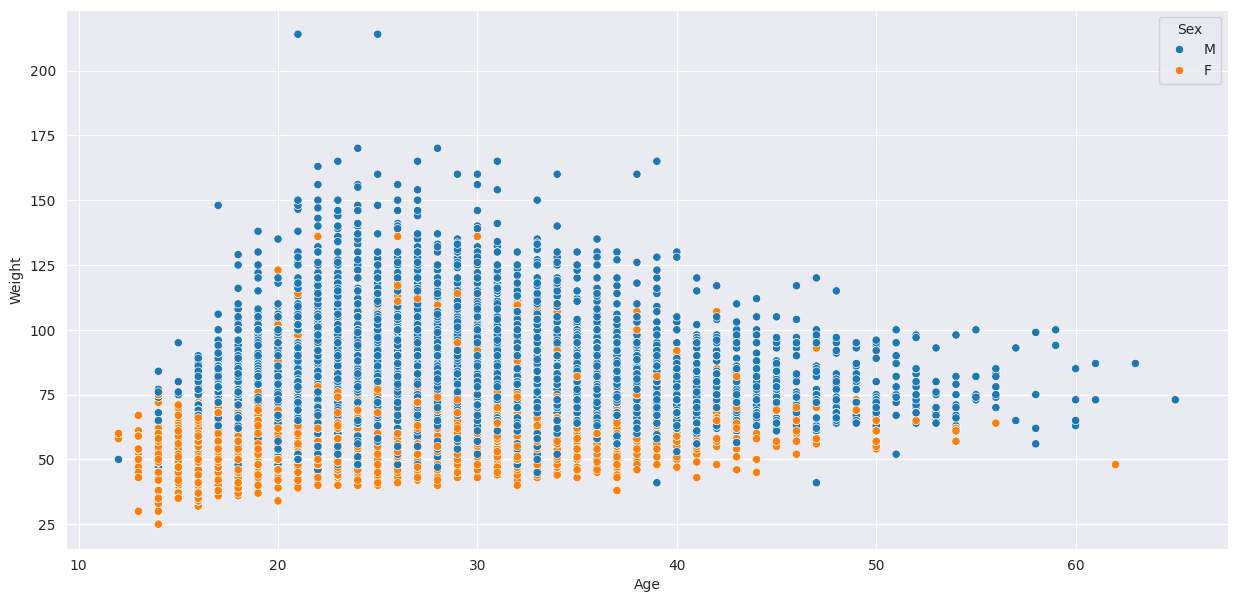

In [35]:
 # Age vs Weight Spread
 age_weig = data[(data.Age != 0.0) & (data.Weight != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
 plt.figure(figsize=(15,7))
 sns.scatterplot(x=age_weig.Age, y=age_weig.Weight, data=age_weig, hue='Sex')
 plt.xlabel('Age')
 plt.ylabel('Weight')

Text(0, 0.5, 'Height')

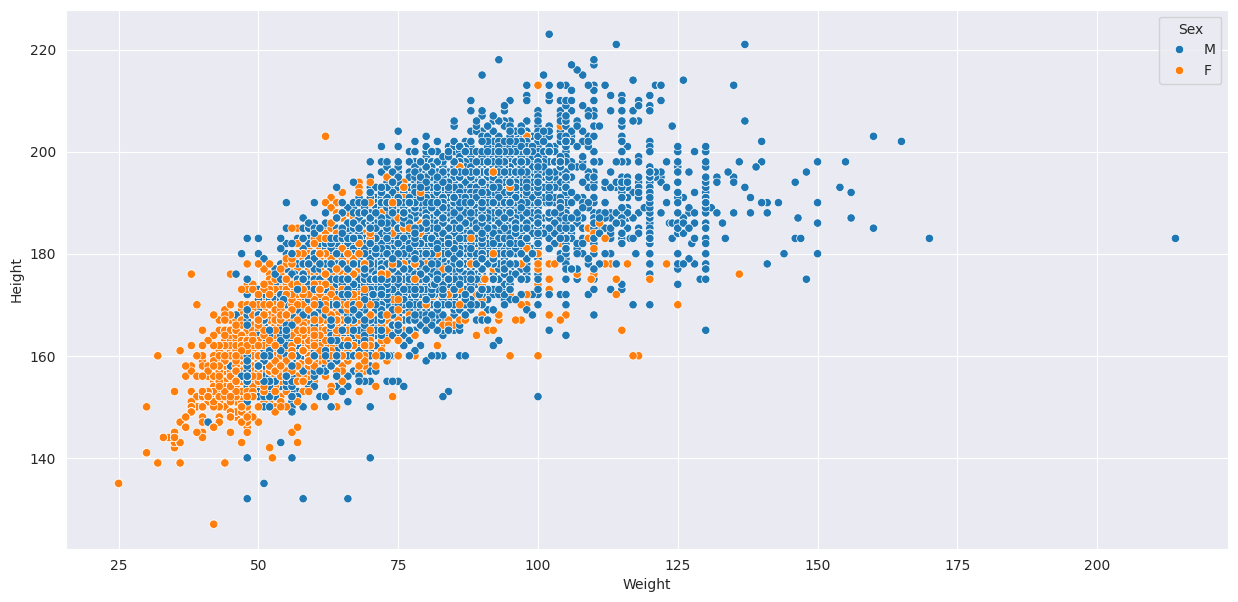

In [36]:
 # Weight & Height Spread
 heig_weight = data[(data.Height != 0.0) & (data.Age != 0) & (data.Weight != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
 plt.figure(figsize=(15,7))
 sns.scatterplot(x=heig_weight.Weight, y=heig_weight.Height, data=heig_weight, hue='Sex')
 plt.xlabel('Weight')
 plt.ylabel('Height')

Data cleaning

In [37]:
 # To fill missing values in Medal column with 0's and 1's
 data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)
 data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66484,34012,"Mohamed Muktar Jama ""Mo"" Farah",M,29.0,175.0,58.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 5,000 metres",1
66485,34012,"Mohamed Muktar Jama ""Mo"" Farah",M,29.0,175.0,58.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 10,000 metres",1
66486,34012,"Mohamed Muktar Jama ""Mo"" Farah",M,33.0,175.0,58.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 5,000 metres",1
66487,34012,"Mohamed Muktar Jama ""Mo"" Farah",M,33.0,175.0,58.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 10,000 metres",1


In [38]:
 # Drop Uncessary feature columns
 data = data.drop(['ID', 'Name', 'Games'], axis=1)
 # Checking null values in the data
 data.isna().mean()

,0
Sex,0.000000
Age,0.038698
Height,0.232745
Weight,0.244943
Team,0.000000
NOC,0.000000
Year,0.000000
Season,0.000000
City,0.000000
Sport,0.000000


In [40]:
 # Group by 'Medal' and 'Sex', calculate the mean, and select only numeric columns
result = data.groupby(['Medal', 'Sex']).mean(numeric_only=True)

# Convert the numeric columns to integers (if needed)
result = result.astype(int)

print(result)

           Age  Height  Weight  Year
Medal Sex                           
0     F     23     167      59  1991
      M     26     178      75  1974
1     F     24     170      62  1992
      M     26     181      79  1965


In [44]:
# Fill null values with mean values for these columns
for column in ['Age', 'Height', 'Weight']:
    # Calculate mean values for each group
    mean_values = data.groupby(['Medal', 'Sex'])[column].transform('mean')
    # Fill missing values using the calculated means
    data[column] = data[column].fillna(mean_values).astype(int)

# Checking null values again
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [45]:
data

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24,180,80,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23,170,60,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24,178,75,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34,181,79,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21,185,82,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
66484,M,29,175,58,Great Britain,GBR,2012,Summer,London,Athletics,"Athletics Men's 5,000 metres",1
66485,M,29,175,58,Great Britain,GBR,2012,Summer,London,Athletics,"Athletics Men's 10,000 metres",1
66486,M,33,175,58,Great Britain,GBR,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 5,000 metres",1
66487,M,33,175,58,Great Britain,GBR,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 10,000 metres",1


In [46]:
 # Checking no. of unique values in the column
 {column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Sex': 2,
 'Team': 806,
 'NOC': 226,
 'Season': 2,
 'City': 42,
 'Sport': 65,
 'Event': 742}

In [59]:
# defining the function.
def binary_encode(df, columns, positive_values): # Removed extra spaces before 'def'
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        # Check if the column exists before one-hot encoding
        if column in df.columns:
            dummies = pd.get_dummies(df[column], prefix=prefix)
            df = pd.concat([df, dummies], axis=1)
            df = df.drop(column, axis=1)
        else:
            print(f"Warning: Column '{column}' not found for one-hot encoding.")
    return df

# Verify if 'Team' column exists before binary encoding
if 'Team' in data.columns:
    data = binary_encode(
        data,
        columns=['Sex', 'Season'],
        positive_values=['M', 'Summer']
    )
else:
    print("Warning: 'Team' column not found for binary encoding.")

# Apply one-hot encoding
data = onehot_encode(
    data,
    columns=['Team', 'NOC', 'City', 'Sport', 'Event'],
    prefixes=['T', 'N', 'C', 'S', 'E']
)
data

,Sex,Age,Height,Weight,Year,Season,Medal,T_A North American Team,T_Acipactli,T_Acturus,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,0,24,180,80,1992,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,23,170,60,2012,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,24,178,75,1920,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,34,181,79,1900,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,21,185,82,1988,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66484,0,29,175,58,2012,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66485,0,29,175,58,2012,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66486,0,33,175,58,2016,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66487,0,33,175,58,2016,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
 # Spilt data in target column and features columns
 y = data['Medal']
 X = data.drop('Medal', axis=1)

Feature Selection

In [61]:
 #Apply SelectKBest and extract top 10 features out of the data
 best = SelectKBest(score_func=chi2, k=10)
 fit = best.fit(X,y)
 data_scores=pd.DataFrame(fit.scores_)
 data_columns=pd.DataFrame(X.columns)
 # Join the two dataframes
 scores=pd.concat([data_columns,data_scores],axis=1)
 scores.columns=['Feature','Score']
 print(scores.nlargest(11,'Score'))

                  Feature        Score
3                  Weight  1633.030932
1024                N_USA  1034.296224
750       T_United States   905.060810
668        T_Soviet Union   806.756533
1022                N_URS   806.210307
1122             S_Rowing   489.703796
2                  Height   371.638577
1108             S_Hockey   317.413751
1123              S_Rugby   292.229592
1588  E_Rugby Men's Rugby   292.229592
888                 N_GDR   238.635627


In [62]:
 # Select 10 features
 features=scores["Feature"].tolist()[:10]
 features

['Sex',
 'Age',
 'Height',
 'Weight',
 'Year',
 'Season',
 'T_A North American Team',
 'T_Acipactli',
 'T_Acturus',
 'T_Afghanistan']

Make new dataset with cleaned data

In [64]:
data=data[['Age','Sex','Height','Weight','Year','Season','T_Afghanistan','T_Algeria','T_Angola','T_Argentina','Medal']]
data.head()

,Age,Sex,Height,Weight,Year,Season,T_Afghanistan,T_Algeria,T_Angola,T_Argentina,Medal
0,24,0,180,80,1992,0,False,False,False,False,0
1,23,0,170,60,2012,0,False,False,False,False,0
2,24,0,178,75,1920,0,False,False,False,False,0
3,34,0,181,79,1900,0,False,False,False,False,1
4,21,0,185,82,1988,0,False,False,False,False,0


In [65]:
 y = data['Medal']
 X = data.drop(['Medal'], axis=1)
 #Split data into training and testing data
 train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

Feature Scaling

In [66]:
 # Scaling data
 scaler = MinMaxScaler()
 train_x = scaler.fit_transform(train_x)
 test_x = scaler.transform(test_x)

Predictive Modeling



In [67]:
 # 1. Logistic Regression
 algo1 = 'LogisticRegression'
 lr = LogisticRegression(random_state=1, max_iter=1000)
 lr.fit(train_x, train_y)
 lr_predict = lr.predict(test_x)
 lr_conf_matrix = confusion_matrix(test_y, lr_predict)
 lr_acc_score = accuracy_score(test_y, lr_predict)
 print("confusion matrix")
 print(lr_conf_matrix)
 print("\n")
 print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
 print(classification_report(test_y,lr_predict))

confusion matrix
[[22989     0]
 [ 3607     0]]


Accuracy of Logistic Regression: 86.43781019702212 

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     22989
           1       0.00      0.00      0.00      3607

    accuracy                           0.86     26596
   macro avg       0.43      0.50      0.46     26596
weighted avg       0.75      0.86      0.80     26596



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# 2. Multinomial Naive Bayes
algo2 = 'MultinomialNB'
nv = MultinomialNB()
nv.fit(train_x, train_y)
nv_predict = nv.predict(test_x)
nv_conf_matrix = confusion_matrix(test_y, nv_predict)
nv_acc_score = accuracy_score(test_y, nv_predict)
print("confusion matrix")
print(nv_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",nv_acc_score*100,'\n')
print(classification_report(test_y,nv_predict))

confusion matrix
[[22989     0]
 [ 3607     0]]


Accuracy of Logistic Regression: 86.43781019702212 

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     22989
           1       0.00      0.00      0.00      3607

    accuracy                           0.86     26596
   macro avg       0.43      0.50      0.46     26596
weighted avg       0.75      0.86      0.80     26596



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
 # 3. Decision Tree
 algo3 = 'DecisionTreeClassifier'
 dt = DecisionTreeClassifier(criterion = 'entropy',random_state=10,max_depth = 30)
 dt.fit(train_x,train_y)
 dt_predicted = dt.predict(test_x)
 dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
 dt_acc_score = accuracy_score(test_y, dt_predicted)
 print("confusion matrix")
 print(dt_conf_matrix)
 print("\n")
 print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
 print(classification_report(test_y,dt_predicted))

confusion matrix
[[20948  2041]
 [ 2052  1555]]


Accuracy of DecisionTreeClassifier: 84.6104677395097 

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     22989
           1       0.43      0.43      0.43      3607

    accuracy                           0.85     26596
   macro avg       0.67      0.67      0.67     26596
weighted avg       0.85      0.85      0.85     26596



In [71]:
 # 4. Random Forest
 algo4 = 'Random Forest Classfier'
 rf = RandomForestClassifier(n_estimators=200, random_state=10,max_depth=15)
 rf.fit(train_x,train_y)
 rf_predicted = rf.predict(test_x)
 rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
 rf_acc_score = accuracy_score(test_y, rf_predicted)
 print("confusion matrix")
 print(rf_conf_matrix)
 print("\n")
 print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
 print(classification_report(test_y,rf_predicted))

confusion matrix
[[22906    83]
 [ 2605  1002]]


Accuracy of Random Forest: 89.89321702511656 

              precision    recall  f1-score   support

           0       0.90      1.00      0.94     22989
           1       0.92      0.28      0.43      3607

    accuracy                           0.90     26596
   macro avg       0.91      0.64      0.69     26596
weighted avg       0.90      0.90      0.87     26596



In [72]:
 # 5. Gradient Boosting
 algo5 = 'Gradient Boosting Classifier'
 gvc =  GradientBoostingClassifier()
 gvc.fit(train_x,train_y)
 gvc_predicted = gvc.predict(test_x)
 gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
 gvc_acc_score = accuracy_score(test_y, gvc_predicted)
 print("confusion matrix")
 print(gvc_conf_matrix)
 print("\n")
 print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
 print(classification_report(test_y,gvc_predicted))

confusion matrix
[[22959    30]
 [ 2724   883]]


Accuracy of Gradient Boosting Classifier: 89.64505940742968 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22989
           1       0.97      0.24      0.39      3607

    accuracy                           0.90     26596
   macro avg       0.93      0.62      0.67     26596
weighted avg       0.90      0.90      0.87     26596



In [74]:
# 6. Neural Network
algo6 = 'Neural Network'
# Use a tuple to define the shape
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)
# Assuming 'fit' was overwritten, rename the SelectKBest instance
select_k_best = fit
# Now use the model's fit method
history = model.fit(
    train_x,
    train_y,
    validation_split=0.4,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8175 - auc: 0.5327 - loss: 0.4503 - val_accuracy: 0.8596 - val_auc: 0.5688 - val_loss: 0.4004
Epoch 2/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8561 - auc: 0.5828 - loss: 0.4057 - val_accuracy: 0.8596 - val_auc: 0.6050 - val_loss: 0.3957
Epoch 3/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8623 - auc: 0.5943 - loss: 0.3927 - val_accuracy: 0.8596 - val_auc: 0.6171 - val_loss: 0.3925
Epoch 4/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8596 - auc: 0.6124 - loss: 0.3933 - val_accuracy: 0.8596 - val_auc: 0.6183 - val_loss: 0.3923
Epoch 5/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8565 - auc: 0.6074 - loss: 0.3991 - val_accuracy: 0.8596 - val_auc: 0.6231 - val_loss: 0.3910
Epoch 6/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8599 - auc: 0.6093 - loss: 0.3920 - val_accuracy: 0.8592 - val_auc: 0.6248 - val_loss: 0.3895
Epoch 7/100
748/748 ━━━━━━━━━━━━━━

In [75]:
 model.evaluate(test_x, test_y)

832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8870 - auc: 0.7328 - loss: 0.3337


[0.3306026756763458, 0.8882162570953369, 0.7338627576828003]